<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo_18/blob/main/Semana_4_Actividad_1_Equipo_18_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

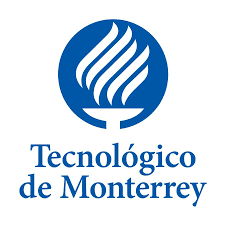

# **TC4029 Ciencia y analítica de datos**

Acrividad Semanal 4

Moisés Rangel Silva A00143704

Profesor: Jobish Vallikavungal Devassia

Octubre 11 de 2022

# Dimension Reduction

In [420]:
import pandas as pd
import numpy as np

# Principal components analysis (PCA) 

* It is a useful method for dimension reduction, especially when the number of variables is large.
* PCA is intended for use with numerical variables. 
   * For categorical variables, other methods such as correspondence analysis are more suitable. 

In [421]:
Credit = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
credit_df = pd.read_csv(Credit)
df = credit_df.copy()
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [422]:
df.shape

(30000, 25)

For each cereal, the data include 13 numerical variables, and we are interested in reducing this dimension.

Para cada nivel de crédito se incluyen 23 variables y estamos interesados en reducir el número de variables o dimensiones para dejar aquéllas que sean representativas para la toma de decisiones

Principal Component Analysis can tell you what variables in your data are the most important. 

In [423]:
# limpieza de datos
# Se limpien los datos para eliminar donde no hay datos

In [424]:
credit_df.isnull().values.any()  #Si existen valores nulos

True

In [425]:
credit_df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [426]:
credit_df[credit_df.isnull()]

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [427]:
ncredit_df = credit_df.copy()         #Se crea copia de la base de datos original

ncredit_df.dropna(inplace = True)      #Se eliminan los renglones con valores NaN de la base de datos
ncredit_df.isna().values.any()         #Al ejecutar nuevamente la función .isna(), muestra que ya no existen valores NaN

False

In [428]:
ncredit_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [429]:
ncredit_df = credit_df.copy()

ncredit_df.dropna(inplace = True)
ncredit_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Se continua con la limpieza de Datos

In [430]:
from os import truncate
ncredit_df = df.copy() #Se hace una copia del DataFarme
print("Total de Datos: "+ str(len(ncredit_df)))

def llenaPromedio():
  for c in range(5,24):
    ncredit_df["X"+str(c)].fillna(value = ncredit_df["X"+str(c)].mean(), inplace = True)

def llenaMedian():
  for c in range(2,5):
    ncredit_df["X"+str(c)].fillna(value = ncredit_df["X"+str(c)].median(), inplace = True)
    

llenaPromedio()
llenaMedian()

print("Total de Registros después de eliminar los nulos: "+ str(len(ncredit_df)))
ncredit_df.isnull().any() #Se checa si el dataframe aún tiene registros nulos

Total de Datos: 30000
Total de Registros después de eliminar los nulos: 30000


ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y       True
dtype: bool

Se eliminarán las variables categóricas que no darán valores cuantitativos para análisis x2: Género, x3: Educaión, x4: Estado Civil, Y: Resultado (Aprovado/No Aprovado)

In [431]:
ncredit_df.drop(["X2","X3","X4","Y"],axis=1, inplace = True) #Este código solo se puede correr una vez.

In [432]:
ncredit_df.head()
ncredit_df.isnull().any()

ID     False
X1     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
dtype: bool

Normalización de los datos para tener la referencia similar entre ellos.

In [433]:
creditnormal_df = ncredit_df.iloc[:,1:3]
creditnormal_df.head()

,X1,X5
0,20000,24.0
1,120000,26.0
2,90000,34.0
3,50000,37.0
4,50000,57.0


In [434]:
std_df = pd.DataFrame(preprocessing.scale(creditnormal_df))
std_df.columns= ["X1","X5"]
std_df

,X1,X5
0,-1.136720,-1.245968
1,-0.365981,-1.028980
2,-0.597202,-0.161028
3,-0.905498,0.164454
4,-0.905498,2.334333
...,...,...
29995,0.404759,0.381442
29996,-0.134759,0.815417
29997,-1.059646,0.164454
29998,-0.674276,0.598430


In [435]:
Variance = np.cov([std_df.X1, std_df.X5])
print("Arreglo de Varianza: \n" + str(Variance))

t= std_df.var().sum() #Cálculo total de Varianza
varX1 =Variance[0][0] #Varianza Total de X1
varX5 = Variance[1][1] #Varianza Total de X5

print("\n")
print('Total Varience \t\t:', t.round(2) )
print('Varience prop. of X1 \t:', ((varX1/t)*100).round(2),'%' )
print('Varience prop. of X5 \t:', ((varX5/t)*100).round(2),'%' )

Arreglo de Varianza: 
[[1.00003333 0.14466728]
 [0.14466728 1.00003333]]


Total Varience 		: 2.0
Varience prop. of X1 	: 50.0 %
Varience prop. of X5 	: 50.0 %


In [436]:
std_df = df[['X1', 'X5']]
std_df.corr()
# X1: Crédito otorgado X2: edad

,X1,X5
X1,1.000000,0.144684
X5,0.144684,1.000000


In [437]:
std_df.X1.mean().round(2)

167484.32

In [446]:
std_df.X5.mean().round(2)

35.48

In [455]:
std_df = df[['X1','X5']]
std_df.var().sum()

16834455767.12926

In [502]:
t= std_df.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

If we drop `Rating` for the sake of dimension reduction, we lose at least 34% of the total variability. 

In [457]:
std_df.corr().round(2)

,X1,X5
X1,1.00,0.14
X5,0.14,1.00


Roughly speaking, 14% of the total variation in both variables is actually “co-variation,” or variation in one variable that is duplicated by similar variation in the other variable. 

Can we use this fact to reduce the number of variables, while making maximum use of their unique contributions to the overall variation? 

Since there is redundancy in the information that the two variables contain, it might be possible to reduce the `two variables` to a `single variable` `without losing` `too much` information. 

The idea in PCA is to find a linear combination of the two variables that contains most, even if not all, of the information, so that this new variable can replace the two original variables.  

The line `z1 (first principal component = PC1)` is the direction in which the variability of the points is largest. 

The `z2 (second principal component = PC2)`-axis is chosen to be perpendicular to the z1-axis.  

In [459]:
import seaborn as sns

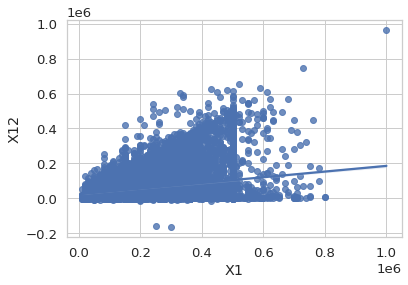

In [460]:
p = sns.regplot(data = df,  
                x = df.X1, 
                y = df.X12
               ) 
p

The weights for z1 are given by (0.8, 0.0): Means, when x axis move -0.847, y axis move 0.532 along regression (line fit) line. 

In [461]:
import numpy as np
from sklearn.decomposition import PCA

In [463]:
pcs = PCA(n_components=2)

pcs.fit(ncredit_df[['X1', 'X5']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,129747.661574,1.000000e+00,1.0
1,9.120300,4.941049e-09,1.0


In [464]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,129747.66,9.12
Proportion of variance,1.00,0.00
Cumulative proportion,1.00,1.00


In [465]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,129747.6616,9.1203
Proportion of variance,1.0000,0.0000
Cumulative proportion,1.0000,1.0000


The summary gives the reallocated variance: 
* `z1` accounts for 80.0% of the total variability and 
* `z2` for the remaining 20.0%. 

Therefore, if we drop `z2 = PC2`, we still maintain 80.0% of the total variability. 

### Scree Plot

In [468]:
import matplotlib as mpl
import matplotlib.pyplot as plt

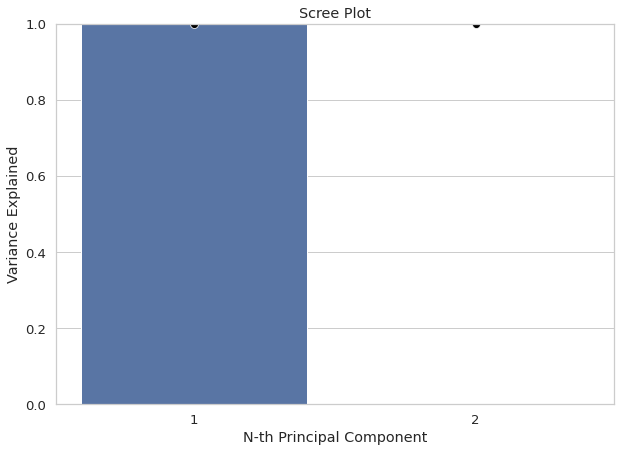

In [469]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

* The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible)
* Each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal the preceding components.

In [470]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 1.,  0.],
       [-0.,  1.]])

In [471]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X1', 'X2']
                                )
pcsComponents_df

,PC1,PC2
X1,1.00000,-0.00001
X2,0.00001,1.00000


> The first column here shows coefficients of linear combination that defines PC1 (z1)

> The second column shows coefficients for PC2 (z2).

The weights are used to compute principal component scores, which are the projected values of calories and rating onto the new axes (after subtracting the means). 

* The average credit amount across the 30000 data is `167484.32` and the average age rating is `35.48`.

* The first column is the projection onto z1 using the weights (0.80, 0.0). 

    * The second column is the projection onto z2 using the weights (0.0, 0.80). 
  

In [472]:
scores = pd.DataFrame(pcs.transform(df[['X1', 'X1']]),
                      columns=['x', 'y']
                      )
scores.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- X5

  warnings.warn(message, FutureWarning)


,x,y
0,-147484.117488,19966.031452
1,-47483.089813,119965.003767
2,-77483.398115,89965.312072
3,-117483.809185,49965.723146
4,-117483.809185,49965.723146


In [473]:
x = (-0.847)*(70-106.88)+(0.532)*(68.4-42.67)

y = (0.531508)*(70-106.88)+(0.847053)*(68.4-42.67)

In [474]:
print('For the PC1\n \t x = ', x, '\n\t y = ', y)

For the PC1
 	 x =  44.92572 
	 y =  2.1926586500000056


In [475]:
scores.x.mean()

1.7208383718594908

In [476]:
scores.y.sum()

5023465153.31366

The sum of the variances `var(z1) + var(z2)` is equal to the sum of the variances of the original variables, `var(calories) + var(rating)`.  

In [477]:
scores.x.var() + scores.y.var()

33668911364.31459

In [478]:
df.X1.var() + df.X1.var()

33668911364.31458

In [479]:
((scores.x.var()/
  (scores.x.var()+scores.y.var())
 )*100).round(0)

50.0

In [480]:
pcs = PCA()
pcs.fit(credit_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Standard deviation,155846.188861,37338.865667,27844.266356,21441.524438,20314.800613,18521.060369,17040.622246,16328.049834,11623.455093,10434.984690,...,9.200732e+00,2.257324e+00,9.433975e-01,7.681627e-01,7.329742e-01,5.967776e-01,5.120730e-01,4.725236e-01,4.186398e-01,3.858854e-01
Proportion of variance,0.848685,0.048717,0.027091,0.016064,0.014420,0.011986,0.010147,0.009316,0.004721,0.003805,...,2.958006e-09,1.780500e-10,3.109881e-11,2.061867e-11,1.877291e-11,1.244455e-11,9.162584e-12,7.801918e-12,6.124002e-12,5.203206e-12
Cumulative proportion,0.848685,0.897402,0.924493,0.940557,0.954978,0.966964,0.977111,0.986427,0.991147,0.994952,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Scree Plot

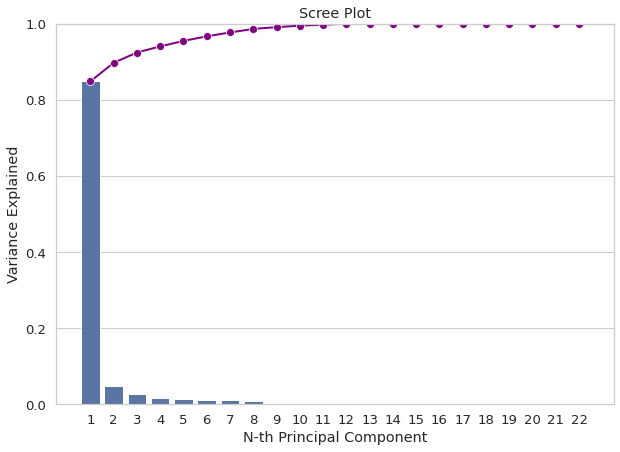

In [481]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'purple', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


Note that the first three components account for more than 92.45 % of the total variation associated with all 23 of the original variables.

Wirth the two componentes the model gave us 89.74%.

In [482]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]+pcsSummary_df.iloc[1][2]
#OR
((pcsSummary_df.iloc[2][2])*100).round(0)
#type(pcsSummary_df)

92.0

In fact, the first two principal components alone capture 92% of the total variation.

In [483]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
#OR
((pcsSummary_df.iloc[2][1])*100).round(2)

89.74

In [484]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Standard deviation,155846.1889,37338.8657,27844.2664,21441.5244,20314.8006,18521.0604,17040.6222,16328.0498,11623.4551,10434.9847,...,9.2007,2.2573,0.9434,0.7682,0.733,0.5968,0.5121,0.4725,0.4186,0.3859
Proportion of variance,0.8487,0.0487,0.0271,0.0161,0.0144,0.0120,0.0101,0.0093,0.0047,0.0038,...,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.8487,0.8974,0.9245,0.9406,0.9550,0.9670,0.9771,0.9864,0.9911,0.9950,...,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000


In [485]:
pcs.components_

array([[ 4.14763924e-08, -8.19842459e-08,  3.28648635e-06,
         1.37296785e-06,  1.81976900e-06,  1.80122511e-06,
         1.81894730e-06,  1.85059945e-06,  1.91446269e-06,
         4.46564614e-01,  4.40876931e-01,  4.29190770e-01,
         3.97475369e-01,  3.69455882e-01,  3.52646862e-01,
         2.49713944e-02,  2.83979937e-02,  2.38406863e-02,
         1.93439005e-02,  1.89953469e-02,  2.06234747e-02,
        -3.74534362e-08],
       [-1.31535982e-06, -2.67443623e-08, -1.77862764e-06,
        -1.19471868e-06, -1.49922488e-06, -3.83971863e-07,
         1.25856223e-06,  2.66404700e-06,  3.67350413e-06,
        -5.48882540e-01, -3.93876862e-01, -5.03369377e-02,
         2.57520562e-01,  4.24119764e-01,  4.79734737e-01,
         4.35456796e-02,  1.69332197e-01,  1.41885797e-01,
         1.00101304e-01,  6.19836300e-02, -1.23246264e-02,
         5.64571798e-08],
       [-3.61443865e-07, -6.52096907e-08,  3.65940622e-06,
        -3.94452205e-06, -4.19653198e-06, -3.31787763e-06,
    

In [486]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = credit_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X3,4.147639e-08,-1.315360e-06,-3.614439e-07,-1.877246e-06,5.176662e-07
X4,-8.198425e-08,-2.674436e-08,-6.520969e-08,-2.313793e-08,-2.082281e-08
X5,3.286486e-06,-1.778628e-06,3.659406e-06,1.058339e-05,-1.840941e-06
X6,1.372968e-06,-1.194719e-06,-3.944522e-06,-8.168131e-06,1.924437e-06
X7,1.819769e-06,-1.499225e-06,-4.196532e-06,-7.856632e-06,2.309637e-06
X8,1.801225e-06,-3.839719e-07,-3.317878e-06,-8.949826e-06,8.257493e-07
X9,1.818947e-06,1.258562e-06,-1.278271e-06,-9.807269e-06,2.008021e-06
X10,1.850599e-06,2.664047e-06,-2.269910e-06,-8.505553e-06,-1.236853e-06
X11,1.914463e-06,3.673504e-06,-3.578189e-06,-6.813255e-06,8.569043e-07
X12,4.465646e-01,-5.488825e-01,-1.901878e-01,3.137959e-01,7.828899e-02


In [487]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = credit_df.iloc[:, 3:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
X3,4.147639e-08,-1.315360e-06,-3.614439e-07,-1.877246e-06,5.176662e-07,-6.873092e-07,2.742598e-08,8.425372e-07,2.689951e-07,1.181499e-06,...,1.517606e-02,0.052884,-5.790480e-02,9.884696e-01,-9.784907e-02,-1.684922e-03,-1.598969e-02,7.922223e-02,7.792830e-04,-2.092865e-02
X4,-8.198425e-08,-2.674436e-08,-6.520969e-08,-2.313793e-08,-2.082281e-08,1.484774e-07,-3.785233e-07,-5.552804e-08,1.637817e-07,3.384221e-07,...,-2.351661e-02,0.002671,1.224705e-02,-7.985415e-02,6.982366e-03,6.645699e-03,-2.906603e-02,9.938214e-01,-7.965145e-03,-6.504619e-02
X5,3.286486e-06,-1.778628e-06,3.659406e-06,1.058339e-05,-1.840941e-06,-1.080465e-06,-2.499672e-06,2.154974e-06,-4.168256e-06,-2.385677e-06,...,9.994294e-01,0.018050,1.826362e-03,-1.777859e-02,1.990687e-03,-4.230198e-04,-4.592423e-04,2.215342e-02,-5.707168e-04,5.013631e-04
X6,1.372968e-06,-1.194719e-06,-3.944522e-06,-8.168131e-06,1.924437e-06,-1.875885e-06,8.985680e-07,3.209890e-07,3.401135e-06,4.394302e-06,...,-5.845803e-03,0.335802,-6.219609e-01,-1.143919e-01,-6.123451e-01,2.775882e-01,-1.400481e-01,3.629804e-03,-2.358847e-02,1.227882e-01
X7,1.819769e-06,-1.499225e-06,-4.196532e-06,-7.856632e-06,2.309637e-06,-2.744077e-06,8.294783e-07,-5.835151e-07,2.585978e-06,5.545291e-06,...,-8.079084e-03,0.422485,-4.234926e-01,-1.327648e-02,2.945162e-01,-5.792576e-01,4.552489e-01,1.913064e-02,1.095444e-01,4.712489e-03
X8,1.801225e-06,-3.839719e-07,-3.317878e-06,-8.949826e-06,8.257493e-07,3.528324e-06,2.667189e-07,-5.011474e-07,1.683638e-06,4.260059e-06,...,-8.442037e-03,0.440756,-1.037186e-01,1.927788e-02,5.671676e-01,1.487305e-01,-6.213974e-01,-2.225858e-02,-2.521856e-01,2.250491e-02
X9,1.818947e-06,1.258562e-06,-1.278271e-06,-9.807269e-06,2.008021e-06,7.578573e-07,1.378985e-06,-1.468132e-06,3.577560e-06,8.187115e-07,...,-7.793553e-03,0.434974,2.425068e-01,1.137344e-02,1.529821e-01,5.765262e-01,3.274186e-01,4.547767e-03,5.371833e-01,-1.490337e-02
X10,1.850599e-06,2.664047e-06,-2.269910e-06,-8.505553e-06,-1.236853e-06,-9.083279e-07,-5.606089e-07,-6.688561e-07,5.427006e-06,2.971147e-06,...,-8.185077e-03,0.410330,3.943670e-01,-1.155477e-02,-1.982262e-01,4.815868e-02,3.471935e-01,5.002568e-05,-7.163176e-01,2.522329e-02
X11,1.914463e-06,3.673504e-06,-3.578189e-06,-6.813255e-06,8.569043e-07,8.472270e-10,3.292202e-06,1.267619e-06,4.944089e-06,4.310138e-06,...,-7.652594e-03,0.388608,4.460463e-01,-3.825826e-02,-3.744666e-01,-4.790785e-01,-3.972176e-01,-1.343161e-02,3.474270e-01,-9.733565e-03
X12,4.465646e-01,-5.488825e-01,-1.901878e-01,3.137959e-01,7.828899e-02,-4.581892e-01,8.576915e-03,7.779003e-02,1.713131e-01,-2.669268e-01,...,-7.455572e-06,0.000005,2.019373e-06,-5.226899e-07,8.504026e-07,1.196105e-06,-1.329622e-06,-1.130054e-07,-2.671830e-07,-6.334047e-07


* Normalize and then performing PCA on the correlation matrix instead of the covariance matrix. 
* Using the correlation matrix means that you are operating on the normalized data. 

In [491]:
from sklearn import preprocessing

#### Normalize the 23 variables due to the different scales of the variables and then perform PCA (or equivalently, we use PCA applied to the correlation matrix)

In [492]:
credit_df.iloc[:, 3:].head()

,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [493]:
pcs = PCA()
pcs.fit(preprocessing.scale(credit_df.iloc[:, 3:].dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.


PCA()

In [494]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Standard deviation,2.5549,1.9620,1.2460,1.2110,0.9827,0.9529,0.9418,0.9340,0.9283,0.8848,...,0.7623,0.6311,0.5101,0.4994,0.4346,0.3632,0.2650,0.2022,0.1590,0.1524
Proportion of variance,0.2967,0.1750,0.0706,0.0667,0.0439,0.0413,0.0403,0.0397,0.0392,0.0356,...,0.0264,0.0181,0.0118,0.0113,0.0086,0.0060,0.0032,0.0019,0.0011,0.0011
Cumulative proportion,0.2967,0.4717,0.5422,0.6089,0.6528,0.6941,0.7344,0.7740,0.8132,0.8488,...,0.9369,0.9550,0.9668,0.9782,0.9867,0.9927,0.9959,0.9978,0.9989,1.0000


In [495]:
pcsSummary_df.iloc[2,6]

0.7343650812478748

* Now we find that we need seven principal components to account for more than 73.4% of the total variability. 
* The first two principal components account for only 47.17% of the total variability, and thus reducing the number of variables to two would mean losing a lot of information. 

In [496]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=credit_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X3,0.023586,-0.078447,-0.316472,0.253329,0.358395,-0.232026,0.052816
X4,-0.003970,-0.034026,0.468122,-0.433347,0.074505,-0.066477,0.045370
X5,0.011256,0.059548,-0.474522,0.441915,-0.042425,0.034588,-0.028348
X6,0.172755,-0.304254,-0.022021,0.011266,-0.240913,0.001266,0.057815
X7,0.206353,-0.335450,0.017397,0.038618,-0.080768,-0.075073,0.001905
X8,0.212440,-0.344052,0.062247,0.070136,0.042001,-0.057651,-0.000586
X9,0.218986,-0.344887,0.089931,0.093576,0.133802,-0.041306,-0.006504
X10,0.222333,-0.331086,0.109906,0.100523,0.169831,0.008219,-0.041365
X11,0.216937,-0.303535,0.112101,0.097231,0.164264,0.042929,-0.124992
X12,0.329462,0.167462,-0.145469,-0.166038,-0.024120,-0.053715,0.029115


In [497]:
pcsComponents_df.PC1.idxmax()

'X15'

In [498]:
pcsComponents_df.PC1.nlargest(3)

X15    0.348888
X16    0.346810
X14    0.344821
Name: PC1, dtype: float64

In [499]:
pcsComponents_df.PC2.idxmin()

'X9'

In [500]:
pcsComponents_df.PC2.nsmallest(3)

X9   -0.344887
X8   -0.344052
X7   -0.335450
Name: PC2, dtype: float64

In [501]:
print('*'*55,'End','*'*55)

******************************************************* End *******************************************************


##Parte 2: Responde las siguientes preguntas 

#####**¿Cuál es el número de componentes mínimo y por qué?** 
Después de hacer el análisis y eliminar las variables categóricas y en función del análisis realizado se considera que el número mínimo de componentes para explicar le modelo son dos, y los que mejor analizan los datos son la edad y el monto del crédito (X5 y X1).

#####**¿Cuál es la variación de los datos que representan esos componentes?**

Estos componentes representan más del 90% de la variación de los datos con los dos componentes (89.5%)


#####**¿Cuál es la pérdida de información después de realizar PCA?**

Bajo este modelo se pierde 10.5% de los datos, y las dos variables significativas selecciondas son el 89.5%

#####**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

La de mayor importancia es la edad (X5) ya que refleja lo relevante de la cantidad de crédito a ser autorizada (X1) y la de menor importancia es la X2 que representa el Género, que al ser categórica no permite un análisis cuantitiativo y proporcional, y no hay forma de relacionar si se es hombre o mujer para la autorización del crédito y de las formas de pago.

#####**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
El módelo PCA es un método útil para la reducción de dimensiones o variables que no agregan valor a la toma de decisiones, en particular cuando la cantidad de variables y sus datos son muy grande como en el caso que se analiza. un buen análisis deberá ser solo sobre variables y sus datos significativos, haer esto aporta una herramienta mejor para el Machine Learning.